# resmod: A package for deriving orthogonalized interaction terms, reporting interaction analyses, and visualization of interactions.



---
Below is a documentation and examples for the resmod package. This document outlines the motivation behind the package, the theoretical rationale and formulas behind each approach, and provides citation support so that users and statisticians can feel confident in using the functions.



# resmod Package: Introduction and Documentation

---



## Introduction

The **resmod** package is designed to streamline the estimation and interpretation of interaction effects in regression models. It implements state‐of‐the‐art methods—such as residual centering (or orthogonalization) and simulation‐based prediction—to reduce collinearity and to provide a clearer understanding of moderated relationships. By offering functions that automatically estimate models, generate simulated predictions, and produce publication‐quality plots, **resmod** helps applied researchers, statisticians, and social scientists to conduct moderation and interaction analyses with confidence.

The package is especially useful for:
- **Residual Centering and Orthogonalization:** Reducing collinearity between the interaction term and its component predictors.
- **Flexible Plotting:** Producing figures that clearly display the predicted lines and associated confidence or prediction intervals, along with dense simulated datapoints for robust estimates that reflect the underlying model.

## Adding resmod to interaction analysis workflow supports robust inferences for interaction effects.
We will begin with a breakdown and ratoinaile for the main components of the package before moving into a demonstration of the functions


## Residual Centering / Orthogonalization Breakdown


___

### Purpose and Motivation
When testing interaction effects in regression (e.g., $Y = \beta_0 + \beta_1X + \beta_2Z + \beta_3XZ + \epsilon $), the product term $XZ$ becomes highly correlated with its components $X$ and $Z$. This collinearity inflates standard errors and complicates the interpretation of the main effects. Residual centering (or orthogonalization) is one method to mitigate this issue by transforming one of the predictors prior to forming the interaction. The result is an interaction term that is independent of its components while still retaining the information necessary to test the hypothesized interaction.


### Theory and Rationalie

Residual centering is based on the idea of removing the shared variance between predictors before forming the interaction term. For example, when testing an interaction between $X$ (focal predictor) and $Z$ (moderator), one approach is to regress $Z$ on $X$ and then use the residuals, $e_Z$, to form the interaction $X \times e_Z$. This approach ensures that the interaction term is uncorrelated with $X$, thus reducing multicollinearity. This method is widely recommended in the literature on moderation analysis (Aiken & West, 1991; Cohen et al., 2003).

### Probelms this approach redresses
1. Prevents the violation of regression assumptions of residual independence
2. Prevents having to run multiple analyses on the same outcome
3. Allows the retention of hypothesized interaction to show the hypothesis test as oritionally intended
4. Allows for an interpretation the connects with the literature as you can show and interpret in one model direct and interaction effects. (e.g., prior work supports two variables have a direct effect and your analysis shows the interaction hypothesis test - you can interpret the direct effects to connect with the broader literature while showing the results of your interaction effect).  

### Formulas

1. **Residual Extraction:**  
   Regress the moderator $Z$ on the focal predictor $X$:
   $
   Z = \alpha_0 + \alpha_1 X + \varepsilon
   $
   The residual is then computed as:
   $
   e_Z = Z - (\alpha_0 + \alpha_1 X)
   $

2. **Orthogonalized Interaction Term:**  
   The interaction term is then constructed as:
   $
   \text{Interaction Term} = X \times e_Z
   $

**Relevant Package Citations:**
- Aiken, L. S., & West, S. G. (1991). *Multiple Regression: Testing and Interpreting Interactions*. Newbury Park, CA: Sage.
- Bauer, D. J., & Curran, P. J. (2005). Probing interactions in fixed and multilevel regression: Inferential and graphical techniques. Multivariate behavioral research, 40(3), 373-400.
- Cohen, J., Cohen, P., West, S. G., & Aiken, L. S. (2003). *Applied Multiple Regression/Correlation Analysis for the Behavioral Sciences* (3rd ed.). Mahwah, NJ: Lawrence Erlbaum Associates.
- Hayes, A. F. (2013). *Introduction to Mediation, Moderation, and Conditional Process Analysis: A Regression-Based Approach*. Guilford Press.
- Little, T. D., Card, N. A., Bovaird, J. A., Preacher, K. J., & Crandall, C. S. (2007). Structural equation modeling of mediation and moderation with contextual factors. Modeling contextual effects in longitudinal studies, 1, 207-230.




## Plotting and Visualization



---

### Purpose and Motivation
#### Visualization
Clear and informative visualizations are critical for interpreting interaction effects. The **resmod** package provides functions that plot the estimated lines along a standardized grid of the focal predictor, overlay simulated points (using the simulation-based predictions), and allow for customization in terms of colors, labels, jitter, and transparency. When faceting by a second moderator (mod2), separate models are estimated per facet and the predicted lines and simulated points are generated accordingly.

#### Simulating points for Visualization
Estimating interaction effects involves understanding not only the point estimates but also the uncertainty around the predictions at various levels of the moderators. Simulation-based methods draw on the estimated coefficient vector and its covariance matrix to generate a distribution of predicted values. These simulations are used to construct confidence (or prediction) intervals and to display dense datapoints that mirror the behavior of the estimated line.


### Theory and Rationaile
#### Visualization
Visual representation helps diagnose model fit and interaction behavior. By overlaying simulated points that are drawn from the same distribution used to compute the predicted lines, the plots provide a direct visualization of model uncertainty and the density of predictions across the range of predictors. Adding jitter (both in x and y dimensions) helps to avoid overplotting while preserving the overall trend.
#### Simulating points for Visualization
Simulation-based prediction is founded on the assumption that the estimated coefficients follow a multivariate normal distribution:
$
\boldsymbol{\beta} \sim \mathcal{N}(\hat{\boldsymbol{\beta}}, \hat{\Sigma})
$
Given a design matrix $X$, predicted outcomes are computed as:
$
\hat{Y} = X\boldsymbol{\beta}
$
By drawing many samples from $\mathcal{N}(\hat{\boldsymbol{\beta}}, \hat{\Sigma})$, one can obtain an empirical distribution of $\hat{Y}$ at each value of $X$. The mean of these draws represents the best estimate, and quantiles (e.g., 2.5th and 97.5th percentiles) can form a confidence interval.
##### Formulas
- **Prediction at Grid Point $x_i$:**
  $
  \hat{y}_{i}^{(j)} = x_i \cdot \boldsymbol{\beta}^{(j)} \quad \text{for } j = 1, \ldots, n_{\text{sim}}
  $
- **Mean Prediction:**
  $
  \bar{y}_i = \frac{1}{n_{\text{sim}}} \sum_{j=1}^{n_{\text{sim}}} \hat{y}_{i}^{(j)}
  $
- **Confidence Interval (e.g., 95\%):**
  $
  \text{CI}_i = \left[\text{Quantile}_{2.5\%}(\{\hat{y}_{i}^{(j)}\}),\; \text{Quantile}_{97.5\%}(\{\hat{y}_{i}^{(j)}\})\right]
  $

### Visualization Features
- **Standardized Predictor Axis:**  
  Continuous predictors are converted to z-scores (standardized) to enhance comparability across studies.
- **Consistent Coloring:**  
  Lines and simulated points share the same color (with points rendered with partial transparency, e.g., alpha = 0.5) to ensure clear visual correspondence.
- **Jittering:**  
  Both x_jitter and y_jitter parameters allow for random perturbations to reduce overplotting.
- **Faceting:**  
  When a second moderator is provided, separate subplots (facets) are generated, each with its own model estimation and simulation.

**Citations:**
- Wilkinson, L., & Friendly, M. (2009). The History of the Cluster Heat Map. *The American Statistician*, 63(2), 179–184.
- Tufte, E. R. (2001). *The Visual Display of Quantitative Information* (2nd ed.). Cheshire, CT: Graphics Press.
- Gelman, A., Carlin, J. B., Stern, H. S., Dunson, D. B., Vehtari, A., & Rubin, D. B. (2013). *Bayesian Data Analysis* (3rd ed.). Boca Raton, FL: CRC Press.
- McElreath, R. (2020). *Statistical Rethinking: A Bayesian Course with Examples in R and Stan* (2nd ed.). CRC Press.




## Documentation and Examples of *resmod* Functions

Getting data for examples and loading packages

In [1]:
# Package downloading
import sys
from IPython.utils import io
if 'google.colab' in sys.modules:

  with io.capture_output() as captured:
      !pip install resmod==0.2.3 watermark

# resmod
import resmod as rm # for residual centered interaction terms

# data handling and analysis
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf             # for estimation
import statsmodels as sms
from statsmodels import datasets                  # for importing data

# plotting
from matplotlib import pyplot as plt
import seaborn as sns




In [2]:
# getting data
duncan_prestige = sms.datasets.get_rdataset("Duncan", "carData")
dat = duncan_prestige.data
## recoding job type numerically
dat["job_type"] = np.array(duncan_prestige.data.type.astype('category').cat.codes)


In [3]:
dat.head()

,type,income,education,prestige,job_type
rownames,,,,,
accountant,prof,62,86,82,1
pilot,prof,72,76,83,1
architect,prof,75,92,90,1
author,prof,55,90,76,1
chemist,prof,64,86,90,1


### **Residual Centering** : `resmod.single.residual_center`

---
**Purpose:**  
This function computes orthogonalized interaction terms via residual centering. It does for a two-way interaction by specifying which two variables for the intreaction.

so by first regressing one moderator on the focal predictor (or vice versa) and then computing the residuals, which are subsequently multiplied by the focal predictor.

**Theoretical Justification:**  
As described above, residual centering reduces multicollinearity between an interaction term and its main effects. This allows for more reliable estimates and interpretable main effects.

**Usage:**  
Users call this function with two variable columns from a data frame. In the event that required packages (such as NumPy) are missing, an informative error is raised.

**Citation:**  
- Aiken, L. S., & West, S. G. (1991)
- Cohen (2003)

#### Documentation and inputs

In [16]:
help(rm.single.residual_center)

Help on function residual_center in module resmod.single.residual_center:

residual_center(v1, v2)
    Extracts centered residuals for specified interaction term
    to be used in any regression frame work (e.g., ols, rlm, etc.).
    
    
    Author
    ------
    Drew E. Winters <drewEwinters@gmail.com>
    
    
    Parameters
    ----------
    v1: array_like
        A specified variable for interaction
    v2: array_like
        A second specified variable for interaction
    
    
    Returns
    -------
    ndarray
        An array of centered residuals with the same length as v1 and v2.
        If v1 and v2 are different lengths then an error is returned.
    
    
    Notes
    -----
    Centering residuals for interaction terms prevents violating assumptions
        of non correlated residuals in regression based methods.
    This allows the direct coefficiencts to be interpreted as though
        the interaction was not included in the model (little et al, 2006).
    
    
 

#### Examples

##### Creating array of centered residual values

In [4]:
rm.single.residual_center(dat.income, dat.education)

array([   63.11264837,   229.8491846 ,   741.28285426,  -191.61545996,
         143.13497759, -1522.02012271,   250.49755451,  1222.03876523,
         281.50598242,   463.22429449,  -657.16077574,   951.3190848 ,
         923.98157381,  -761.79683046,  -500.35610126,  -798.28161848,
        -474.82578368,  -357.03501052,  -457.2861054 ,   585.94123821,
        -981.98093767,  -476.50649685,  -312.02816875,  -549.40617942,
         165.39170698,  -458.91783728, -1052.25086135,  -293.40322494,
         169.06536061,  -372.67648496,   101.34978524,  1153.8352266 ,
        -337.3613032 ,   599.90768769,   386.69161908,   248.37917402,
         182.34841689,   117.02343887,   679.23266571,   360.97604371,
         115.6538024 ,   194.02207051,   612.22286945,  -485.36288933,
          98.28416593])

##### Adding array to a dataframe column

In [5]:
dat_e1 = dat.copy()
dat_e1["education_job_rc"] = (rm.single.residual_center(dat.education, dat.job_type))
dat_e1.head()

,type,income,education,prestige,job_type,education_job_rc
rownames,,,,,,
accountant,prof,62,86,82,1,-2.495351
pilot,prof,72,76,83,1,-5.295015
architect,prof,75,92,90,1,-0.815553
author,prof,55,90,76,1,-1.375486
chemist,prof,64,86,90,1,-2.495351


##### Demonstration of traditional interaction and residual centering

###### **Direct model**

- prestige as a functoin of education and job type

In [6]:
smf.ols("prestige ~ education + job_type", data=dat_e1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     62.18
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           2.79e-13
Time:                        18:08:21   Log-Likelihood:                -187.64
No. Observations:                  45   AIC:                             381.3
Df Residuals:                      42   BIC:                             386.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2914      5.013     -0.258      0.798     -11.408       8.826
education      1.0451      0.111      9.389      0.000       0.820       1.270
job_type      -8.9183      4.685     -1.904      0.064     -18.372       0.536
==============================================================================
Omnibus:                        3.964   Durbin-Watson:                   1.023
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.369
Skew:                           0.670   Prob(JB):                        0.186
Kurtosis:                       3.008   Cond. No.                         131.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### **Traditional interaction model**

- prestige as a function of education that is different in respect to job type

In [7]:
smf.ols("prestige ~ education * job_type", data=dat_e1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     52.09
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           4.80e-14
Time:                        18:08:29   Log-Likelihood:                -183.26
No. Observations:                  45   AIC:                             374.5
Df Residuals:                      41   BIC:                             381.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -14.2992      6.357     -2.249      0.030     -27.138      -1.461
education              1.5165      0.189      8.028      0.000       1.135       1.898
job_type              21.4850     11.113      1.933      0.060      -0.958      43.928
education:job_type    -0.6546      0.221     -2.967      0.005      -1.100      -0.209
==============================================================================
Omnibus:                        1.692   Durbin-Watson:                   1.299
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                1.091
Skew:                           0.376   Prob(JB):                        0.580
Kurtosis:                       3.133   Cond. No.                         484.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***NOTE*: The direct coefficients in this interaction model are not the same as the direct model.**
- This is becauese the residual independence introduced by the traditional interaction term are inflates values artifically.
- Therefore, residual independence is a necessary assumption of regression based models. The estimates from models with correlated residuals are less reliable.

In [8]:
smf.ols("prestige ~ education + job_type + education_job_rc", data=dat_e1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     52.09
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           4.80e-14
Time:                        18:08:34   Log-Likelihood:                -183.26
No. Observations:                  45   AIC:                             374.5
Df Residuals:                      41   BIC:                             381.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2914      4.604     -0.281      0.781     -10.589       8.006
education            1.0451      0.102     10.225      0.000       0.839       1.252
job_type            -8.9183      4.302     -2.073      0.044     -17.606      -0.230
education_job_rc    -0.6546      0.221     -2.967      0.005      -1.100      -0.209
==============================================================================
Omnibus:                        1.692   Durbin-Watson:                   1.299
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                1.091
Skew:                           0.376   Prob(JB):                        0.580
Kurtosis:                       3.133   Cond. No.                         131.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***NOTE*** - In this residual centered interaction model:
1. **The direct coefficients are aproximately the same as the direct model!**
2. **The interaction coefficient is the same as the traditional interaction model!**
- This is becauese
  1. We removed the residual independence introduced by the traditional interaction term by centering the residuals. This prevents the inflation of direct coefficents artifically.
  2. We retained the information relevant for the interaction effect, thus will keep the same estimates as the traditional interaction
- Therefore, estimates from models with residually independent interactions using 'resmod' are more robust. Also we can interpret both direct and interaction effects with only needing to estimate one model.

### **Three-Way Residual Centering** : `resmod.single.three_center`

---

### Purpose
The `three_center` function extends the concept of residual centering to models involving three interacting variables. In many applied contexts, researchers are interested in three-way interactions (e.g., $X \times Z \times W$), where multicollinearity issues can be even more pronounced. The `three_center` function is designed to sequentially remove shared variance from the lower-order terms before forming the higher-order interaction, ensuring that the unique contribution of the three-way interaction is isolated.

### Theory and Reasoning

When dealing with three-way interactions, it is essential to remove the redundant variance shared among the main effects and lower-order interactions. One strategy is to:
1. Center each predictor by subtracting its mean.
2. Residualize the two-way interaction terms (e.g., $X \times Z$, $X \times W$, and $Z \times W$) with respect to the corresponding main effects.
3. Form the three-way interaction $X \times Z \times W$ using the residualized (or centered) versions of the lower-order terms.

This approach follows the same rationale as two-way residual centering but extends it to account for the complex interrelations in three-way interactions. The goal is to ensure that the highest-order term is independent of the lower-order components, thereby reducing collinearity and enhancing interpretability.

### Formulas

Consider three predictors $X$, $Z$, and $W$:

1. **Mean Centering:**  
   For each variable:
   $
   X_c = X - \bar{X}, \quad Z_c = Z - \bar{Z}, \quad W_c = W - \bar{W}
   $

2. **Residualizing Two-Way Interactions:**  
   For example, for $Z_c$ with respect to $X_c$:
   $
   e_{Z|X} = Z_c - \widehat{\gamma_0} - \widehat{\gamma_1} X_c
   $
   Similar residuals are computed for other two-way combinations.

3. **Constructing the Three-Way Interaction:**  
   The three-way interaction term can then be formed as:
   $
   \text{Three-Way Interaction} = X_c \times e_{Z|X} \times e_{W|X,Z}
   $
   where $e_{W|X,Z}$ represents the residual of $W_c$ after accounting for $X_c$ and $Z_c$.

This systematic centering and residualization process ensures that the interaction term captures only the unique variance associated with the three-way interaction, free of the confounding influences of the lower-order effects.

### Usage

- Call `three_center(data.column1, data.column2, data.column3)` where `data.column#` are the data columns involved in the three-way interaction.  
- **Implementation Note:**  
  The function typically follows a sequential approach: first centering, then residualizing each two-way term, and finally computing the product for the three-way interaction.
  
### Citation Support

- Hayes, A. F. (2013).  
- Aiken, L. S., & West, S. G. (1991).
- Cohen, J., Cohen, P., West, S. G., & Aiken, L. S. (2003).

#### Documentation and inputs

In [17]:
help(rm.single.three_center)

Help on function three_center in module resmod.single.three_center:

three_center(v1, v2, v3)
    Extracts centered residuals for specified interaction term 
        to be used in any regression frame work (e.g., ols, rlm, etc.). 
    
    Author
    ------
    Drew E. Winters <drewEwinters@gmail.com>
    
    
    Parameters
    ----------
    v1: array_like
        A specified variable for interaction  
    v2: array_like
        A second specified variable for interaction 
    v3: array_like
        A third specified variable for interaction 
    
    
    Returns
    -------
    ndarray
        An array of centered residuals with the same length as v1, v2, and v3. 
        If different lengths then an error is returned
    
    
    Notes
    -----
    Centering residuals for interaction terms prevents violating assumptions of
    non correlated residuals in regression based methods.
    This allows the direct coefficiencts to be interpreted as though the
    interaction was not in

#### Examples

##### Creating an array of residual centered three-way interaction values

In [9]:
rm.single.three_center(dat.income, dat.education, dat.prestige)

array([   4772.05291535,   26459.32115153,  118656.61598441,
        -37602.92746188,   39198.74800491, -183237.27900063,
         68109.7086619 ,  179924.56306499,  -74441.83220678,
         73695.6901204 , -109189.83095442,  141359.82297104,
        177970.64563484, -117125.8142879 ,  -73806.33993883,
       -100431.84803594,  -84740.9280171 ,  -57765.85374726,
        -79775.95213371,  105743.31343772, -124251.78934514,
        -97082.16831786, -111230.4071848 ,  -58655.74398585,
          -361.51790791,  -81021.85369737, -108014.98878415,
        -72537.8799828 ,   13420.74269443,  -38094.78910029,
         37781.22771986,  112011.20726695,  -24018.33539905,
         81689.6355129 ,   60133.46303806,   24427.10708318,
         25339.12889224,   44316.46929194,  103217.39026453,
         48967.85766974,   49204.28630066,   43525.39900971,
         87552.05115362,  -77821.44787679,   43733.07952156])

**NOTE** :
- You can do the same procedures in the examples for `residual_center`above to run an three way interaction analysis.
- make sure you create all necesary two-way interactions using `residual_center` to place in your model along with the three way interaction (e.g., `three-way = income * education * prestige`, `two-way1 = income * education`, `two-way2 = income * prestige`, `two-way3 = education *prestige` should all be include into your model as well as the `direct effects = income + education + prestige`)

### **Multiple Variable Residual Centering** : `resmod.sem.orthogonalize`

---
**Purpose:**  
This function computes orthogonalized interaction terms via residual centering. It does so by first regressing one moderator on the focal predictor (or vice versa) and then computing the residuals, which are subsequently multiplied by the focal predictor.

**Theoretical Justification:**  
As described above, residual centering reduces multicollinearity between an interaction term and its main effects. The procedure follows the formulas:  
$
e_Z = Z - \widehat{Z} \quad \text{and} \quad \text{Interaction Term} = X \times e_Z
$
This allows for more reliable estimates and interpretable main effects.

**Usage:**  
Users call this function with two lists of variable names and the data frame. In the event that required packages (such as NumPy) are missing, an informative error is raised. If there are observed variables making up a latent variable that interaction with multiple indicators of another latent variable then all items produced from this function can be used to model that latent interaction (or, if statitically advisable, one could make parcels or a composite score to form the interaction.)

**Citation:**  
- Aiken, L. S., & West, S. G. (1991)
- Littel et al. (2007)

#### Documentation and inputs

In [18]:
help(rm.sem.orthogonalize)

Help on function orthogonalize in module resmod.sem.orthogonalize:

orthogonalize(list1, list2, data)
    Extracts centered residuals for lists of interaction terms
        to be used in specifying a latent varaible interaction term.
    
    Author
    ------
    Drew E. Winters <drewEwinters@gmail.com>
    
    
    Parameters
    ----------
    list1: list or array of strings
            A list of column names of variables for interaction
    list2: list or array of strings
            A second list of column names of variables for interaction
    data: pandas dataframe
          A pandas dataframe
    
    
    Returns
    -------
    pandas dataframe
      A dataframe of centered residuals with names specified by names in
      list 1 and list 2 specifiying the interaction terms list1.list2
    
    
    Notes
    -----
    Centering residuals for interaction terms prevents violating assumptions
    of non correlated residuals in regression based methods.
    This allows the direc

#### Example

##### Dataframe of orthogonalized terms

In [10]:
# Create list of variable names
## variable names must be in brackets for the function to find matching names in provided dataframe
l1 = ["income"] # note can be as long as you would like
l2 = ["education", "prestige"] # note can be as long as you would like

# estimating interactions
  ## placing names lists along with data to pull from
orth_df = rm.sem.orthogonalize(l1,l2,dat)
orth_df.head()

,income.education,income.prestige
0,63.112648,34.246807
1,229.849185,399.315757
2,741.282854,732.789351
3,-191.615460,-277.473163
4,143.134978,276.041595


### **Interaction Plotting** : `resmod.plotting.interact_plot`



---


**Purpose:**  
The simulation-based plotting functions (e.g., `resmod.plot_interaction`) estimate the moderated regression model (or separate models per facet if a second moderator is provided), simulate predictions across a grid of values, and produce plots with overlaid simulated datapoints that reflect the uncertainty in the estimated line.

**Reasoning:**  
These functions leverage the assumption that the estimated regression coefficients follow a multivariate normal distribution:
$
\boldsymbol{\beta} \sim \mathcal{N}(\hat{\boldsymbol{\beta}}, \hat{\Sigma})
$
and generate simulated predictions accordingly. This enables both the computation of confidence intervals and the display of prediction uncertainty via dense simulated datapoints.

In cases where there is a continuous interaction, the +1SD, mean, and -1SD points will be used for plotting. In cases where there are categorical or binary interactions, the points at which the category or dichotomous values are in relation to the interaction will be used

**Usage:**  
The functions allow customization of parameters such as the number of simulation draws (`n_sim`), grid density (`n_grid`), colors, jitter amounts (`x_jitter`, `y_jitter`), and transparency (alpha value for points). When faceted, each facet is handled separately to ensure that the predictions and simulated points are specific to the given level of the second moderator.

**Citation:**  
- Gelman et al. (2013).
- McElreath (2020).
- Bauer, D. J., & Curran, P. J. (2005).

#### Documentation and inputs

In [19]:
help(rm.plotting.interact_plot)

Help on function interact_plot in module resmod.plotting.interact_plot:

interact_plot(outcome, pred, modx, data, controls=None, mod2=None, modx_values=None, modx_legend_labels=None, mod2_values=None, plot_points=False, points_per_facet=100, interval=False, int_width=0.95, x_label=None, y_label=None, colors=None, line_thickness=2, jitter=0, point_size=50, n_sim=100, n_grid=None, x_jitter=0.2, y_jitter=0.2, **kwargs)
    Estimate a regression model (or models, if faceting by a second moderator) and 
    simulate predictions to plot interaction effects.
    
    For a single model (no mod2), the model is estimated using the formula:
        outcome ~ pred * modx [+ controls]
    For a second moderator (mod2), separate models are estimated for each facet 
    (i.e. for each unique or specified value of mod2).
    
    The focal predictor (pred) is standardized (z‐scored) if continuous. For a continuous 
    moderator (modx) with >2 unique values, if modx_values is not supplied then defaul

#### Examples

##### Categorical * Continous interaction

<Axes: xlabel='Standardized education', ylabel='income'>

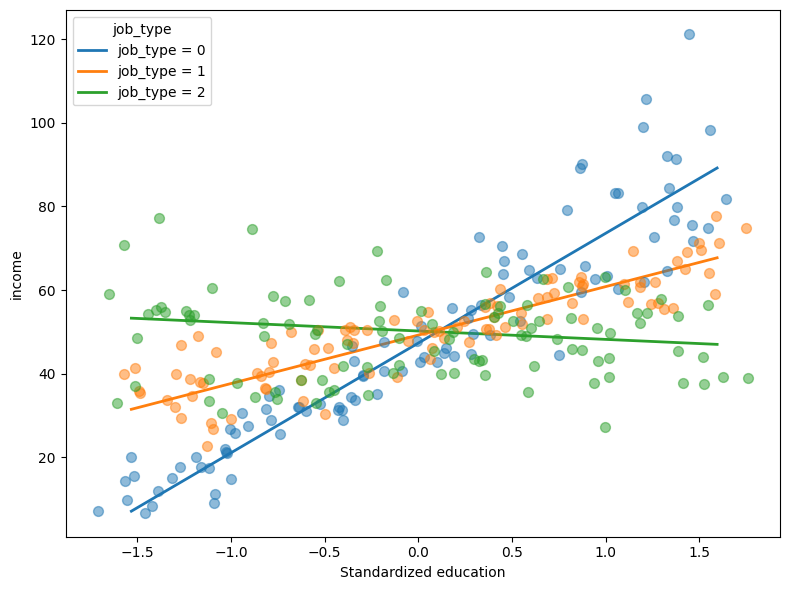

In [29]:
rm.plotting.interact_plot(
    outcome = "income", # our outcome variable is income
    pred = "education", # our predictor is education
    modx = "job_type", # our moderator is specified as job type
    modx_values = np.unique(dat.job_type), # we insert the categorical values to split based on the unique values in jobtype
    data = dat,        # dataframe
    plot_points = True # to plot datapoints default = False because points are simulated and typically not plotted
    )

##### Continuous interaction

<Axes: xlabel='Standardized education', ylabel='income'>

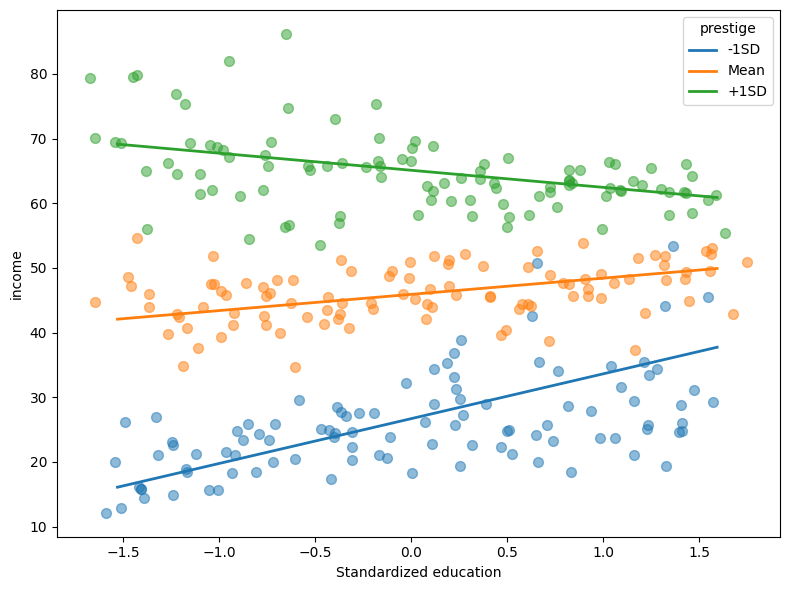

In [30]:
rm.plotting.interact_plot(
    outcome = "income", # our outcome variable is income
    pred = "education", # our predictor is education
    modx = "prestige", # our moderator is specified as job type
    modx_values = None, # our default is none and this will default to deriving SD and mean points of estimating the interaction
    data = dat,        # dataframe
    plot_points = True # to plot datapoints default = False because points are simulated and typically not plotted
    )

##### Three-way interaction

array([<Axes: title={'center': 'job_type = 0'}, xlabel='Standardized education', ylabel='income'>,
       <Axes: title={'center': 'job_type = 1'}, xlabel='Standardized education'>,
       <Axes: title={'center': 'job_type = 2'}, xlabel='Standardized education'>],
      dtype=object)

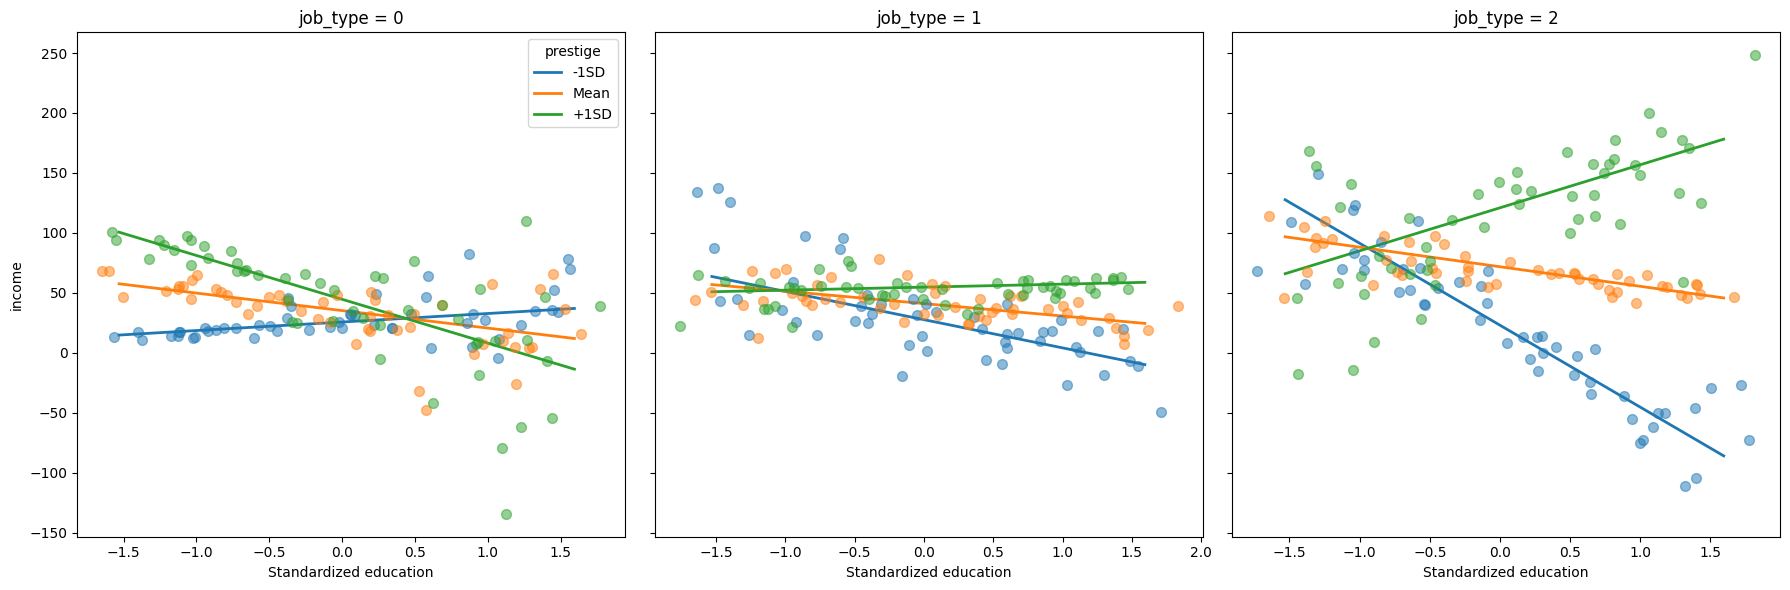

In [35]:
rm.plotting.interact_plot(
    outcome = "income", # outcome
    pred = "education",      # main variable of interest
    modx = "prestige",   # moderator
    mod2 = "job_type",    # second moderator
    mod2_values = np.unique(dat.job_type), # specifying values of second moderator to facet on being the unique categories by job_type
    data = dat,           # dataframe
    plot_points = True,   # plotting points
    n_sim = 10000,        # increasing the numbner of simulations
    x_jitter=0.25, y_jitter = 0.25 # adding jitter on the x and y axes
    )

Here we can see that education and prestige as a different relationship to income as a function of job_type
- job_type 0 high education and high prestige associates with less income
- job_type 2 high education and high prestige associates with exponentially higher income

### **Simple Slopes Calculation** : `resmod.slopes.simple_slopes`

---
### Purpose

The `simple_slopes` function is designed to compute the conditional (or simple) effect of a focal predictor on an outcome variable at specific values of a moderator. In moderated regression, the effect of the predictor varies as a function of the moderator. This function calculates the simple slopes—i.e., the estimated change in the outcome for a one-unit change in the predictor when the moderator is fixed at a given value. When a second moderator (mod2) is provided, the function computes these slopes separately for each specified level of mod2 and concatenates the results into one large DataFrame, with an added column indicating the mod2 level.

### Theoretical Reasoning

In moderated regression models, the regression equation typically takes the form:
$
Y = \beta_0 + \beta_1 X + \beta_2 Z + \beta_3 (X \times Z) + \epsilon,
$
where:
- $ X $ is the focal predictor,
- $ Z $ is the moderator,
- $ X \times Z $ is the interaction term.

The simple slope (or conditional effect) of $ X $ on $ Y $ at a given value $ z $ of the moderator is:
$
\text{Simple Slope} = \beta_1 + \beta_3 z.
$
This tells us how much $ Y $ changes for a one-unit change in $ X $ when $ Z = z $.

### Standard Error Calculation

The standard error of the simple slope is computed using the delta method:
$
\text{se} = \sqrt{\operatorname{Var}(\beta_1) + z^2 \operatorname{Var}(\beta_3) + 2z\, \operatorname{Cov}(\beta_1, \beta_3)}.
$
Using this standard error, one can compute the t–statistic, p–value, and confidence intervals for the simple slope.

### Relevant Formulas

- **Simple Slope:**
  $
  \text{slope} = \beta_{\text{pred}} + z \cdot \beta_{\text{int}}
  $
  where $ z $ is the moderator value at which the slope is calculated.

- **Standard Error of the Simple Slope:**
  $
  \text{se} = \sqrt{\operatorname{Var}(\beta_{\text{pred}}) + z^2 \operatorname{Var}(\beta_{\text{int}}) + 2z\, \operatorname{Cov}(\beta_{\text{pred}}, \beta_{\text{int}})}.
  $

- **t–Value:**
  $
  t = \frac{\text{slope}}{\text{se}}
  $

- **Confidence Interval (e.g., 95%):**
  $
  \text{CI} = \text{slope} \pm t_{\text{crit}} \times \text{se},
  $
  where $ t_{\text{crit}} $ is the critical t–value based on the degrees of freedom and the desired significance level.

### Usage
simple_slopes is used to estimate simple slopes for two and three-way interactions for statistical reporting

## Citations
- Aiken & West (1991).
- Cohen, et al. (2003).


#### Documentation and inputs

In [15]:
help(rm.slopes.simple_slopes)

Help on function simple_slopes in module resmod.slopes.simple_slopes:

simple_slopes(outcome, pred, modx, data, controls=None, mod2=None, modx_values=None, modx_legend_labels=None, mod2_values=None, alpha=0.05)
    Calculate simple slopes for an interaction model.
    
    This function estimates a moderated regression model with the formula:
        outcome ~ pred * modx [+ controls]
    and calculates the simple slope of `pred` at specific values of `modx`.
    
    For a continuous moderator:
      - If modx_values is not supplied, slopes are computed at [mean - SD, mean, mean + SD],
        with the simple slope defined as:
          slope = b_pred + v * b_int,
        and its standard error is given by:
          se = sqrt(Var(b_pred) + v^2 * Var(b_int) + 2*v*Cov(b_pred, b_int)).
      - The row index of the returned DataFrame will be set to the corresponding labels
        (by default, "-1SD", "Mean", "+1SD").
    
    For a categorical or binary moderator, the unique levels are 

### Examples

#### Two-way Continuous Simple slopes

In [21]:
rm.slopes.simple_slopes(
    outcome="prestige",
    pred="education",
    modx="income",
    data=dat,
    controls=None,
    mod2=None,
    modx_values=None,
    alpha=0.05
    )

,income,slope,se,t,p,ci_lower,ci_upper
-1SD,17.431595,0.584467,0.145046,4.029530,0.000236,0.291541,0.877393
Mean,41.866667,0.554240,0.101914,5.438337,0.000003,0.348422,0.760059
+1SD,66.301738,0.524014,0.115861,4.522778,0.000051,0.290028,0.758000


#### Three-way Slopes

In [20]:
rm.slopes.simple_slopes(
    outcome="prestige",
    pred="education",
    modx="income",
    data= dat,
    controls=None,
    mod2="job_type",
    modx_values=None,
    modx_legend_labels=None,
    mod2_values=np.unique(dat.job_type),
    alpha=0.05
    )


,income,at_mod2_value,slope,se,t,p,ci_lower,ci_upper
-1SD,17.431595,0,0.123325,0.276986,0.445241,0.661763,-0.461064,0.707715
Mean,41.866667,0,1.080702,0.450708,2.397786,0.028253,0.129791,2.031614
+1SD,66.301738,0,2.038079,0.870712,2.340703,0.031696,0.201036,3.875121
-1SD,17.431595,1,1.111053,0.510347,2.177055,0.047079,0.016468,2.205637
Mean,41.866667,1,0.600471,0.224296,2.677136,0.018046,0.119404,1.081538
+1SD,66.301738,1,0.089889,0.217899,0.412528,0.686201,-0.377458,0.557237
-1SD,17.431595,2,1.146353,0.227644,5.035718,0.037245,0.166878,2.125828
Mean,41.866667,2,0.769228,0.124124,6.197252,0.025063,0.235165,1.303291
+1SD,66.301738,2,0.392103,0.069534,5.639035,0.030038,0.092924,0.691283


## Additional Analytic Examples - Mixed effects modeling
In this example - we want to know how education and income relate to prestige of a position and this is expected have a different starting point based on the type of job.

#### Direct Model
___

In [ ]:
smf.mixedlm("prestige ~ education + income", data=dat, groups=dat.job_type).fit().summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: prestige 
No. Observations: 45      Method:             REML     
No. Groups:       3       Scale:              94.8491  
Min. group size:  6       Log-Likelihood:     -169.7869
Max. group size:  21      Converged:          Yes      
Mean group size:  15.0                                 
-------------------------------------------------------
            Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-------------------------------------------------------
Intercept   -0.204   11.001 -0.019 0.985 -21.766 21.357
education    0.360    0.111  3.239 0.001   0.142  0.578
income       0.599    0.089  6.719 0.000   0.424  0.773
Group Var  237.734   26.362                            
=======================================================

"""

#### Traditional Interaction
___

In [ ]:
smf.mixedlm("prestige ~ education * income", data=dat, groups=dat.job_type).fit().summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
=============================================================
Model:              MixedLM   Dependent Variable:   prestige 
No. Observations:   45        Method:               REML     
No. Groups:         3         Scale:                87.5523  
Min. group size:    6         Log-Likelihood:       -172.8702
Max. group size:    21        Converged:            Yes      
Mean group size:    15.0                                     
-------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-------------------------------------------------------------
Intercept        -12.064   12.806 -0.942 0.346 -37.164 13.035
education          0.640    0.175  3.651 0.000   0.297  0.984
income             0.844    0.149  5.681 0.000   0.553  1.136
education:income  -0.005    0.003 -2.024 0.043  -0.010 -0.000
Group Var        271.183   31.006                            
=============================================================

"""

***NOTE*: The direct coefficients in this interaction model are not the same as the direct model.**
- This is becauese the residual independence introduced by the traditional interaction term are inflates values artifically.
- Therefore, residual independence is a necessary assumption of regression based models. The estimates from models with correlated residuals are less reliable.

#### Residual Centering
___

In [ ]:
dat["interact_rc"] = (rm.single.residual_center(dat.education, dat.income))
smf.mixedlm("prestige ~ education + income + interact_rc", data=dat, groups=dat.job_type).fit().summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:             MixedLM Dependent Variable: prestige 
No. Observations:  45      Method:             REML     
No. Groups:        3       Scale:              87.5523  
Min. group size:   6       Log-Likelihood:     -172.8702
Max. group size:   21      Converged:          Yes      
Mean group size:   15.0                                 
--------------------------------------------------------
             Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
--------------------------------------------------------
Intercept    -3.050   11.458 -0.266 0.790 -25.507 19.407
education     0.392    0.108  3.625 0.000   0.180  0.604
income        0.610    0.086  7.106 0.000   0.442  0.778
interact_rc  -0.005    0.003 -2.024 0.043  -0.010 -0.000
Group Var   271.183   31.006                            
========================================================

"""

***NOTE*** - In this residual centered interaction model:
1. **The direct coefficients are aproximately the same as the direct model!**
2. **The interaction coefficient is the same as the traditional interaction model!**
- This is becauese
  1. We removed the residual independence introduced by the traditional interaction term by centering the residuals. This prevents the inflation of direct coefficents artifically.
  2. We retained the information relevant for the interaction effect, thus will keep the same estimates as the traditional interaction
- Therefore, estimates from models with residually independent interactions using 'resmod' are more robust. Also we can interpret both direct and interaction effects with only needing to estimate one model.

# Conclusion
---

The **resmod** package is built on well-established statistical methods for handling interaction effects in regression analyses. By implementing residual centering, simulation-based prediction, and advanced visualization techniques, the package offers a robust framework for exploring and interpreting moderated relationships. The theoretical foundations—backed by standard references such as Aiken and West (1991) and Gelman et al. (2013)—provide users with confidence in both the methodology and the practical output of the package.

This documentation, with its detailed introduction, reasoning, formulas, and citations, should help users and statisticians understand the purpose behind each function in **resmod** and feel confident in applying these methods to their data.

---

**References:**

- Aiken, L. S., & West, S. G. (1991). *Multiple Regression: Testing and Interpreting Interactions*. Newbury Park, CA: Sage.
- Bauer, D. J., & Curran, P. J. (2005). Probing interactions in fixed and multilevel regression: Inferential and graphical techniques. Multivariate behavioral research, 40(3), 373-400.
- Cohen, J., Cohen, P., West, S. G., & Aiken, L. S. (2003). *Applied Multiple Regression/Correlation Analysis for the Behavioral Sciences* (3rd ed.). Mahwah, NJ: Lawrence Erlbaum Associates.
- Hayes, A. F. (2013). *Introduction to Mediation, Moderation, and Conditional Process Analysis: A Regression-Based Approach*. Guilford Press.
- Little, T. D., Card, N. A., Bovaird, J. A., Preacher, K. J., & Crandall, C. S. (2007). Structural equation modeling of mediation and moderation with contextual factors. Modeling contextual effects in longitudinal studies, 1, 207-230.
- Tufte, E. R. (2001). *The Visual Display of Quantitative Information* (2nd ed.). Graphics Press.
- Wilkinson, L., & Friendly, M. (2009). The History of the Cluster Heat Map. *The American Statistician*, 63(2), 179–184.

---

In [22]:
%load_ext watermark
%watermark -n -u -v -iv -w -p resmod

Last updated: Mon Mar 31 2025

Python implementation: CPython
Python version       : 3.11.11
IPython version      : 7.34.0

resmod: 0.2.3

resmod     : 0.2.3
seaborn    : 0.13.2
pandas     : 2.2.2
IPython    : 7.34.0
statsmodels: 0.14.4
numpy      : 2.0.2
sys        : 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
matplotlib : 3.10.0

Watermark: 2.5.0

